In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from superpoint.settings import EXPER_PATH
import superpoint.evaluations.descriptor_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def draw_matches(data):
    keypoints1 = [cv2.KeyPoint(p[1], p[0], 1) for p in data['keypoints1']]
    keypoints2 = [cv2.KeyPoint(p[1], p[0], 1) for p in data['keypoints2']]
    inliers = data['inliers'].astype(bool)
    matches = np.array(data['matches'])[inliers].tolist()
    img1 = np.concatenate([output['image1'], output['image1'], output['image1']], axis=2)
    img2 = np.concatenate([output['image2'], output['image2'], output['image2']], axis=2)
    return cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches,
                           None, matchColor=(0,255,0), singlePointColor=(0, 0, 255))

# Changes in viewpoint

In [3]:
experiments = ['sift_hpatches_viewpoint', 'orb_hpatches_viewpoint']

### Images visualization

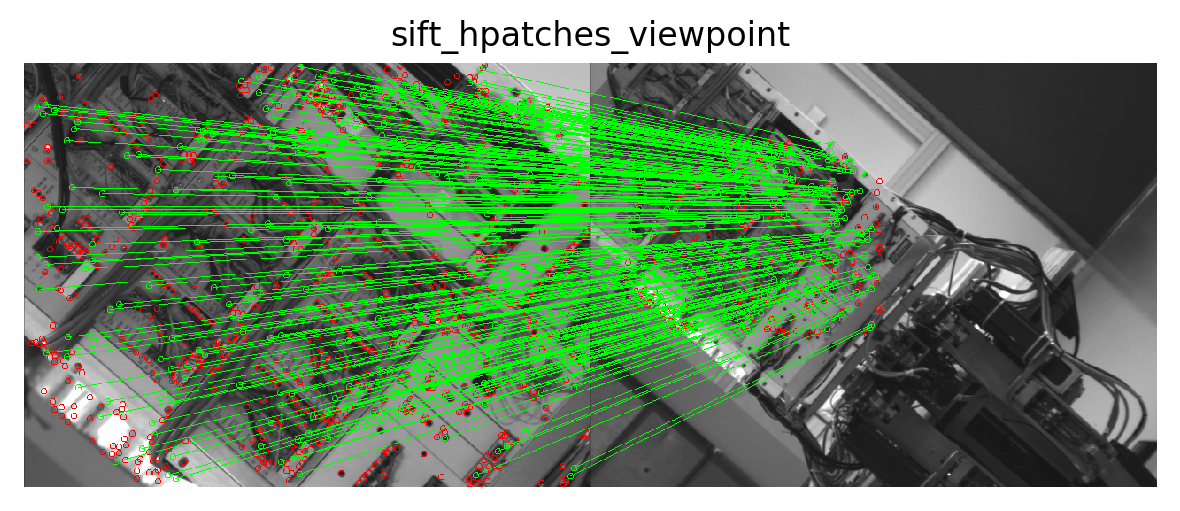

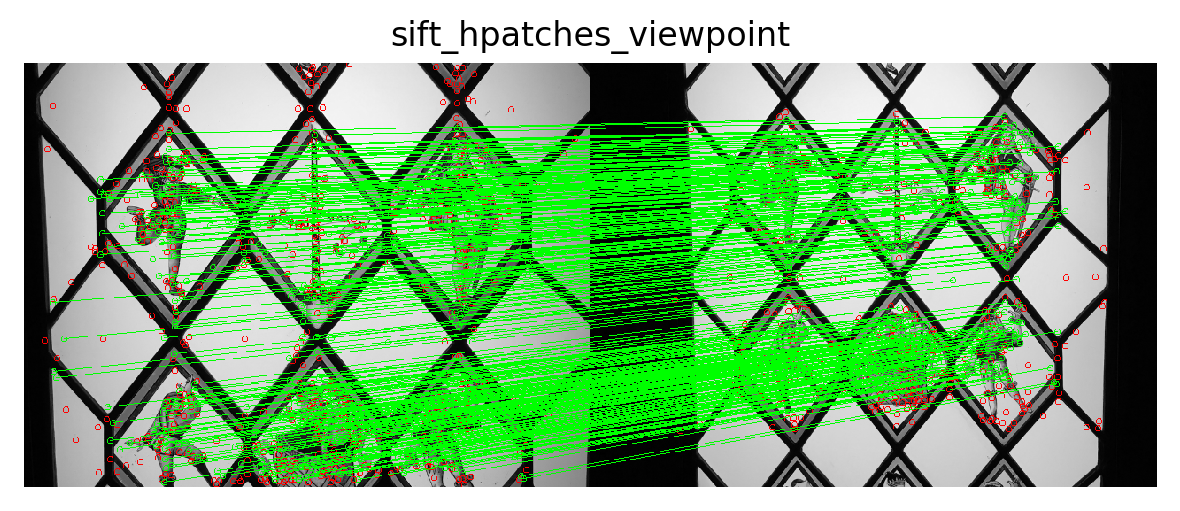

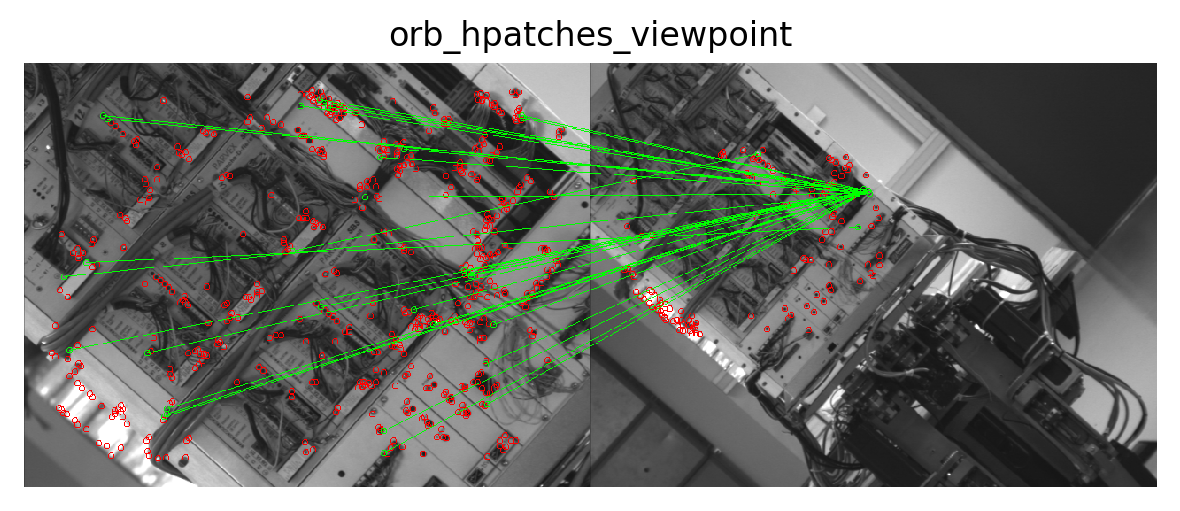

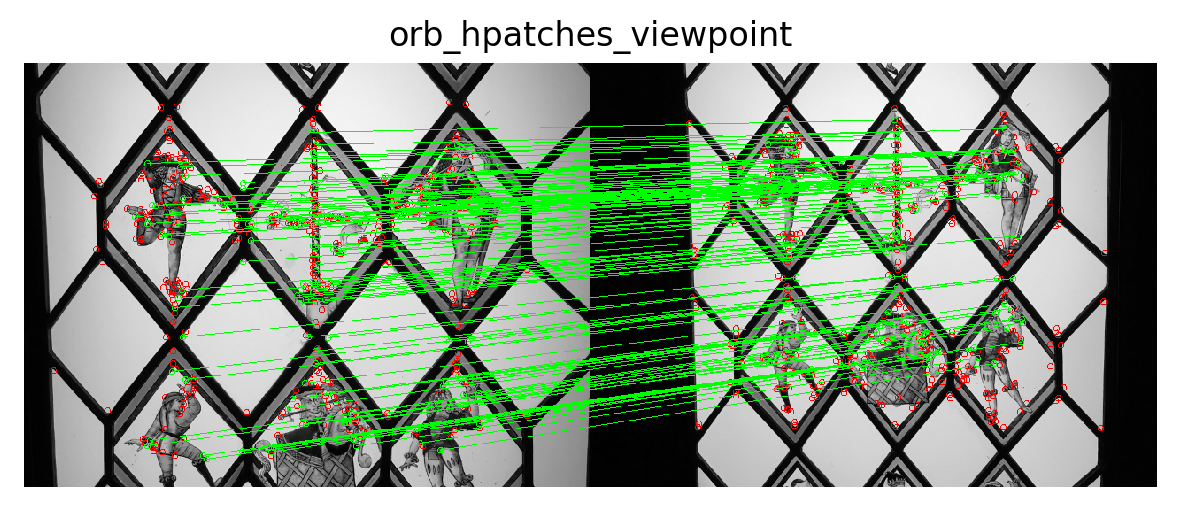

In [4]:
num_images = 2
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    for output in outputs:
        img = draw_matches(output) / 255.
        plot_imgs([img], titles=[e], dpi=200)

### Homography estimation correctness

In [5]:
for exp in experiments:
    orb = True if exp[:3] == 'orb' else False
    correctness = ev.homography_estimation(exp, keep_k_points=1000, correctness_thresh=3, orb=orb)
    print('> {}: {}'.format(exp, correctness))

> sift_hpatches_viewpoint: 0.23389830508474577
> orb_hpatches_viewpoint: 0.11864406779661017


### Check that the image is warped correctly

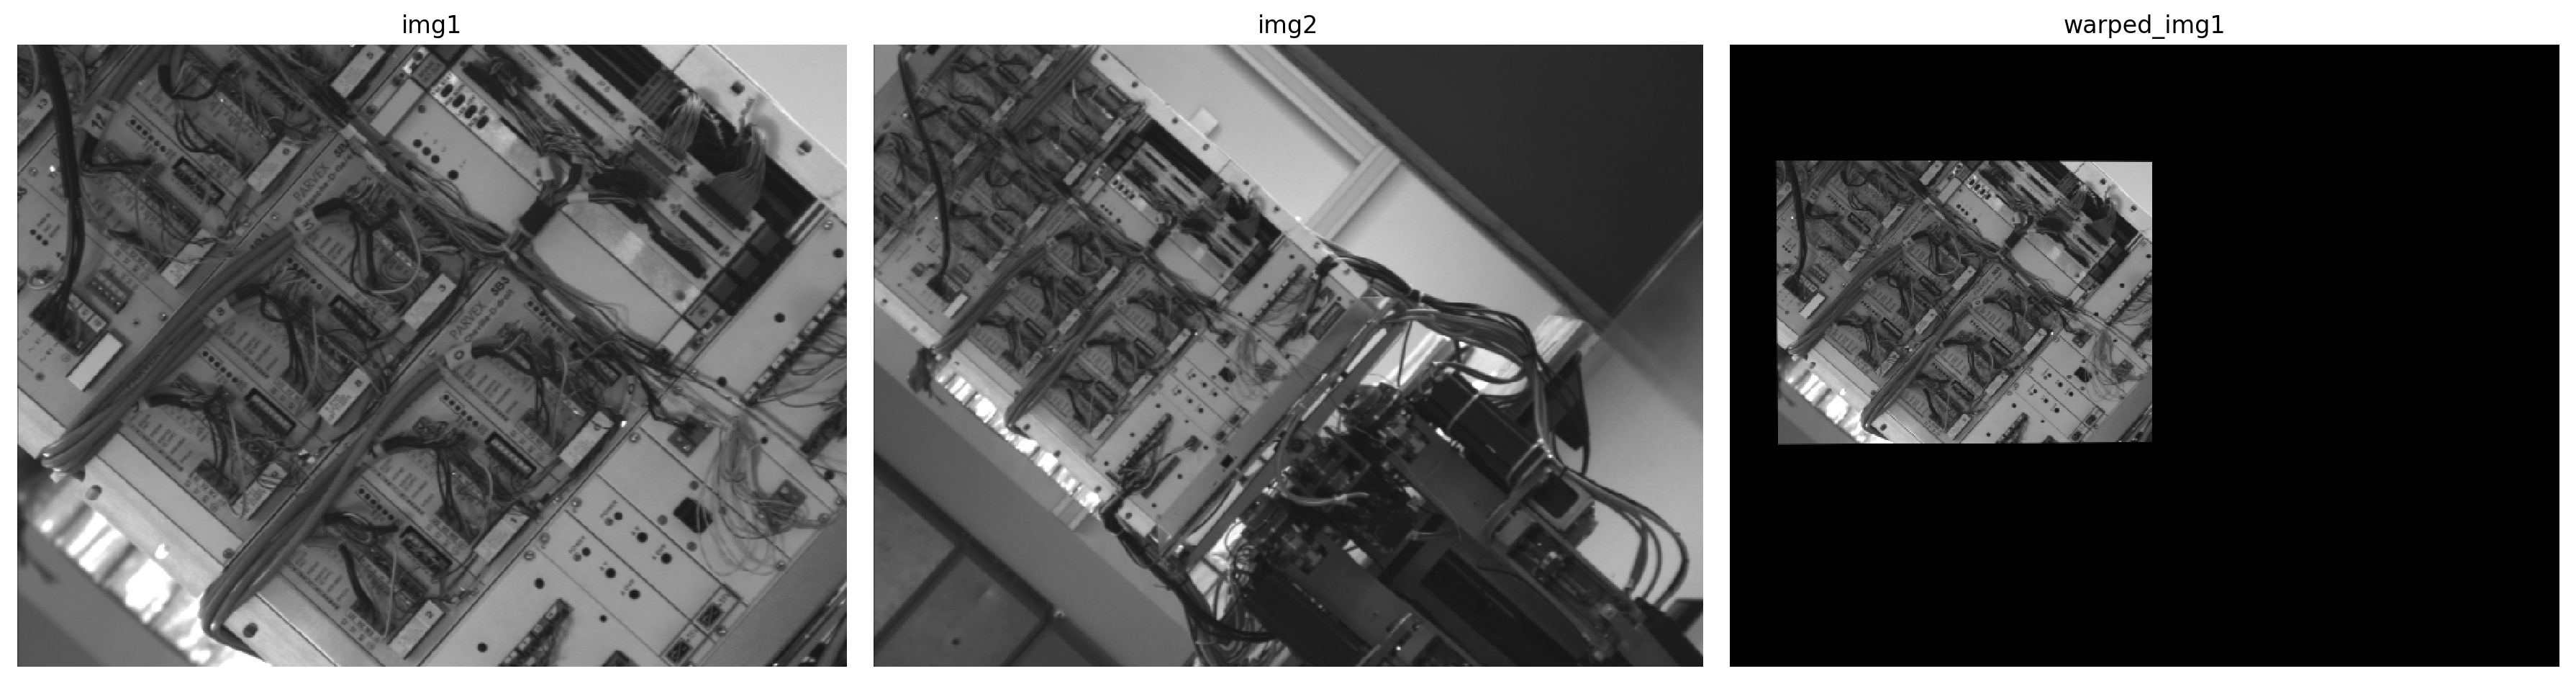

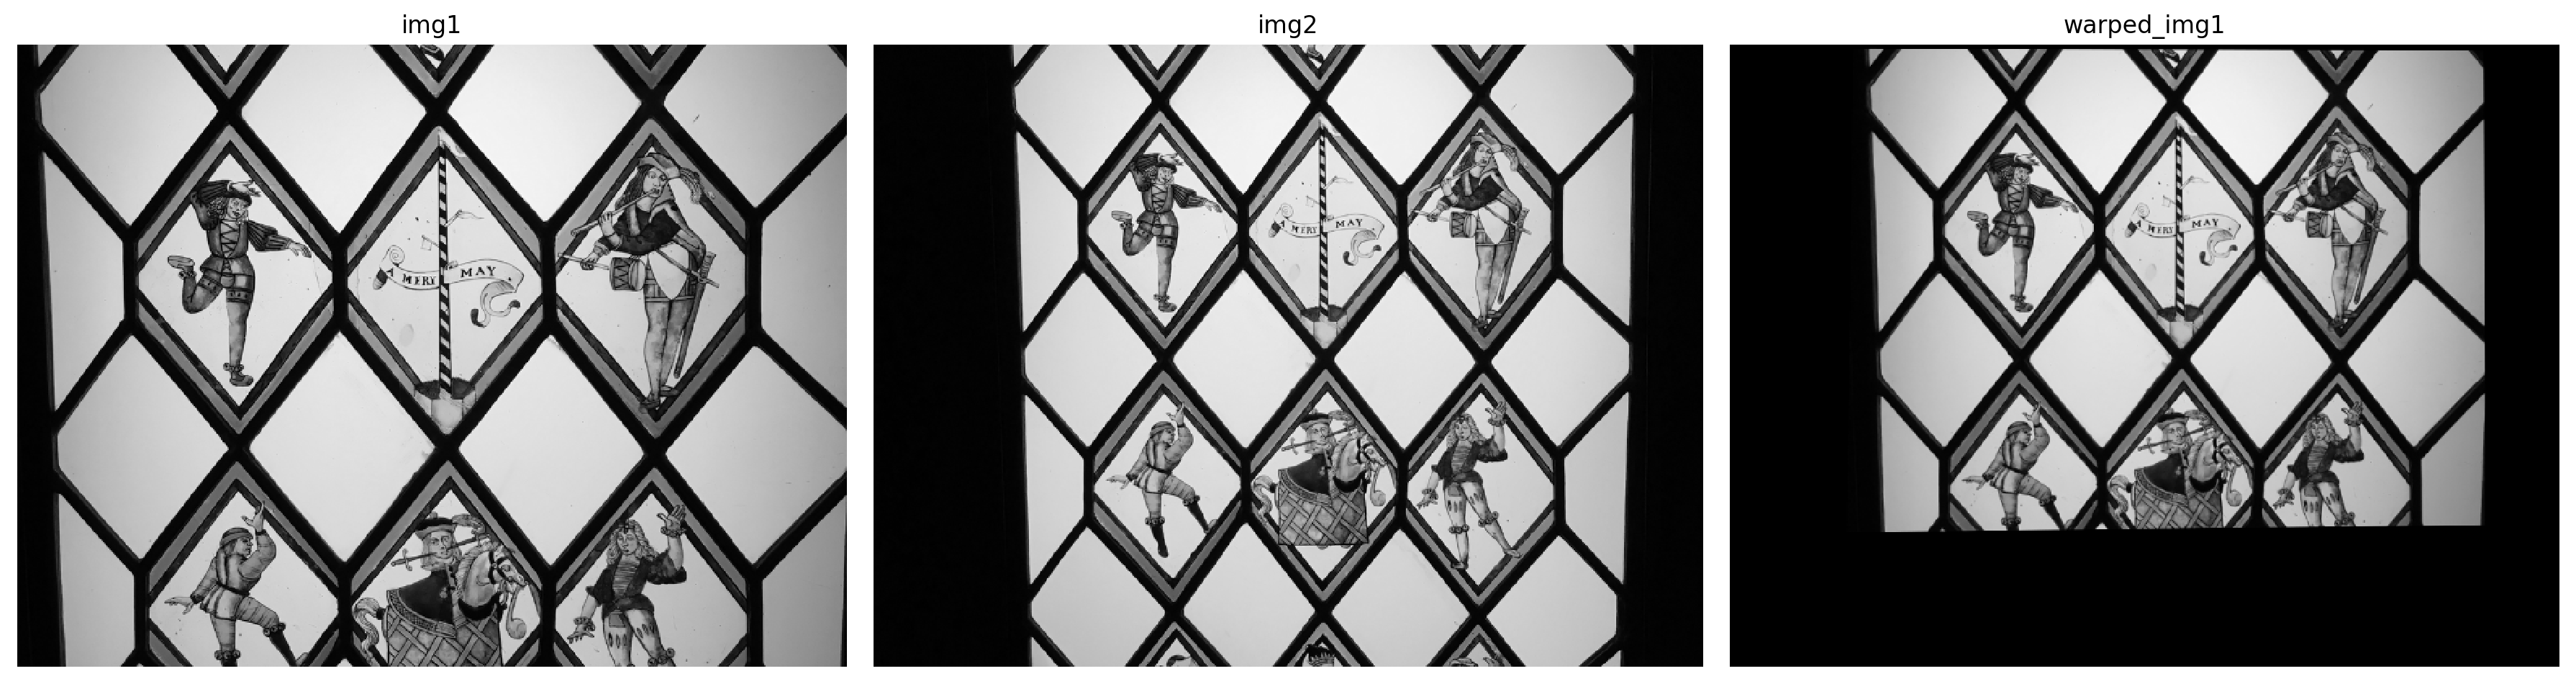

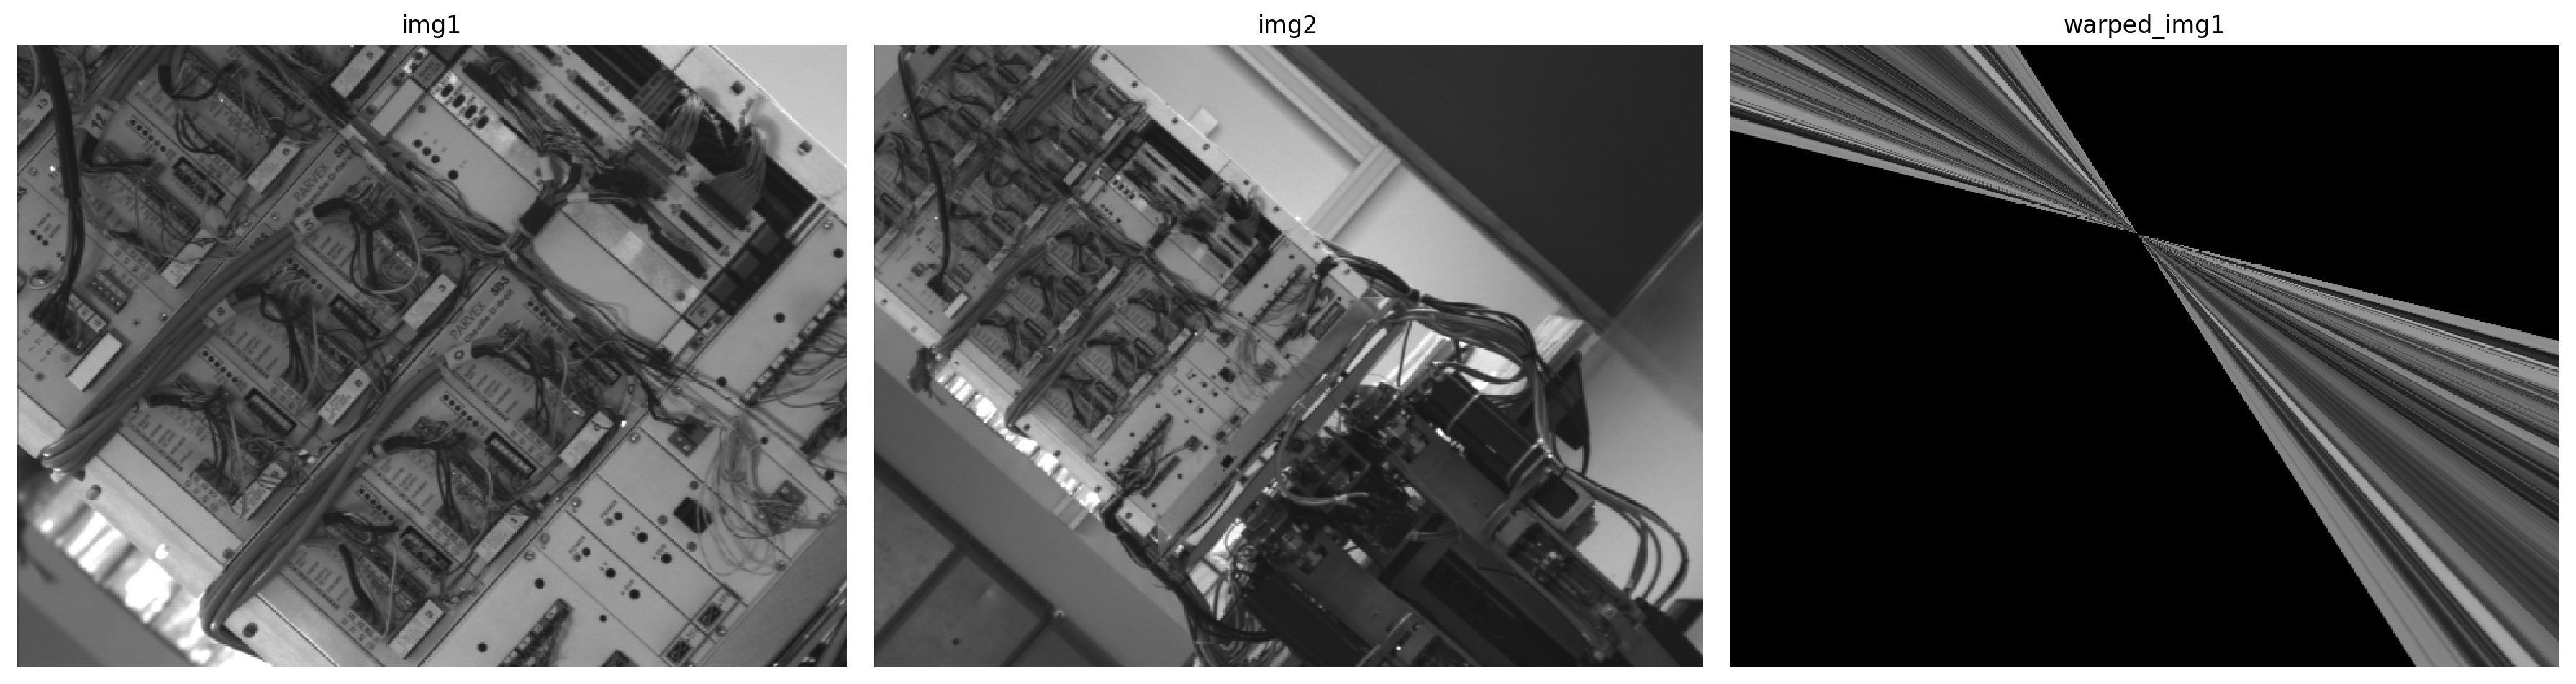

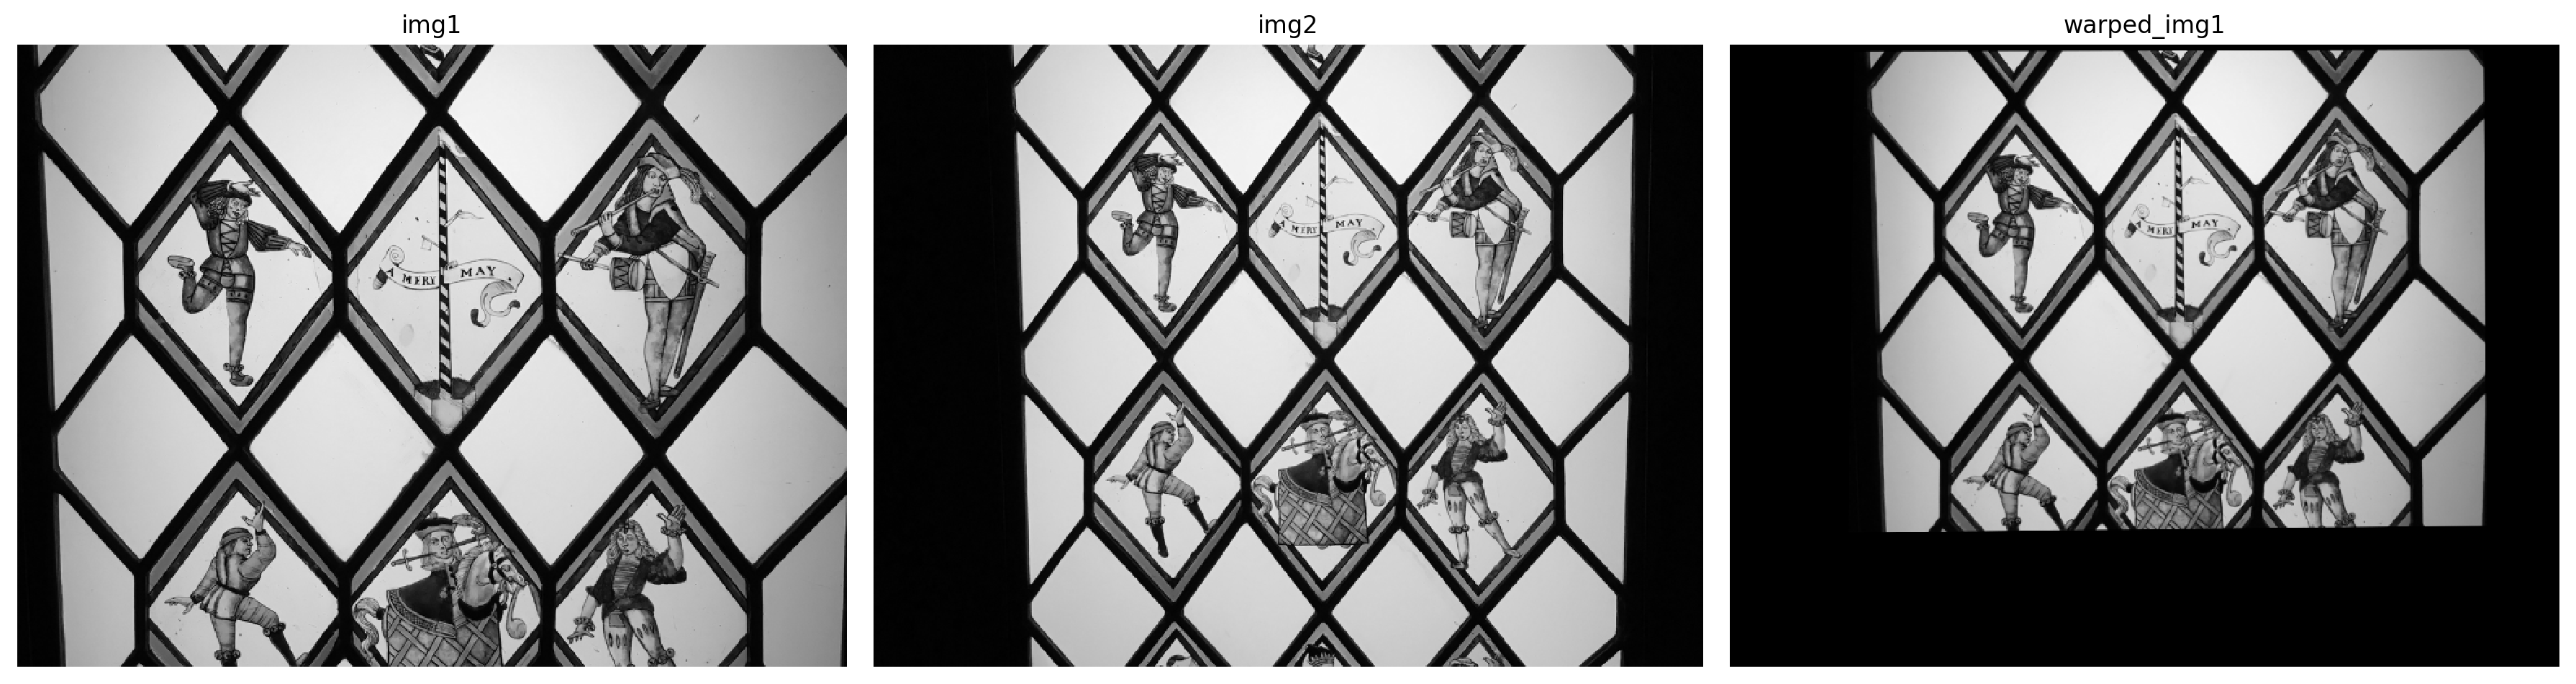

In [6]:
num_images = 2
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    for output in outputs:
        img1 = output['image1']
        img2 = output['image2']
        H = output['homography']
        warped_img1 = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
        img1 = np.concatenate([img1, img1, img1], axis=2)
        warped_img1 = np.stack([warped_img1, warped_img1, warped_img1], axis=2)
        img2 = np.concatenate([img2, img2, img2], axis=2)
        plot_imgs([img1 / 255., img2 / 255., warped_img1 / 255.], titles=['img1', 'img2', 'warped_img1'], dpi=200)

# Changes in illumination

In [7]:
experiments = ['sift_hpatches_illumination', 'orb_hpatches_illumination']

### Images visualization

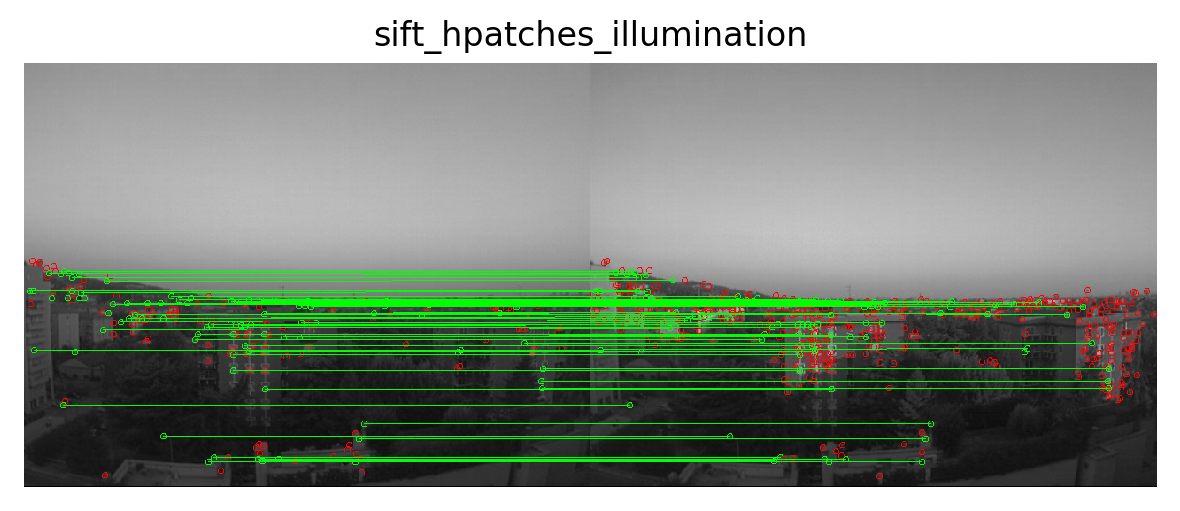

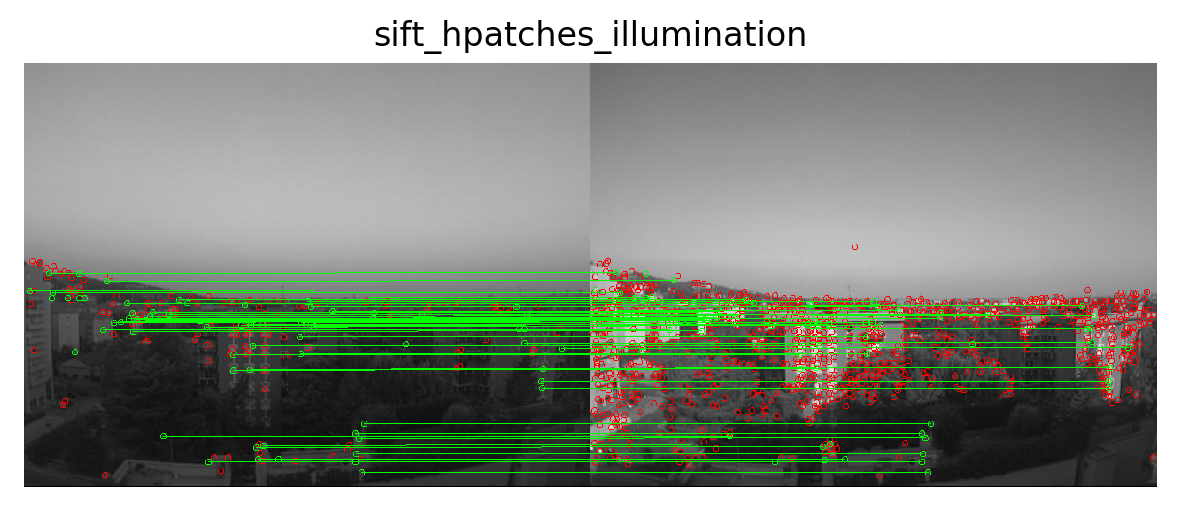

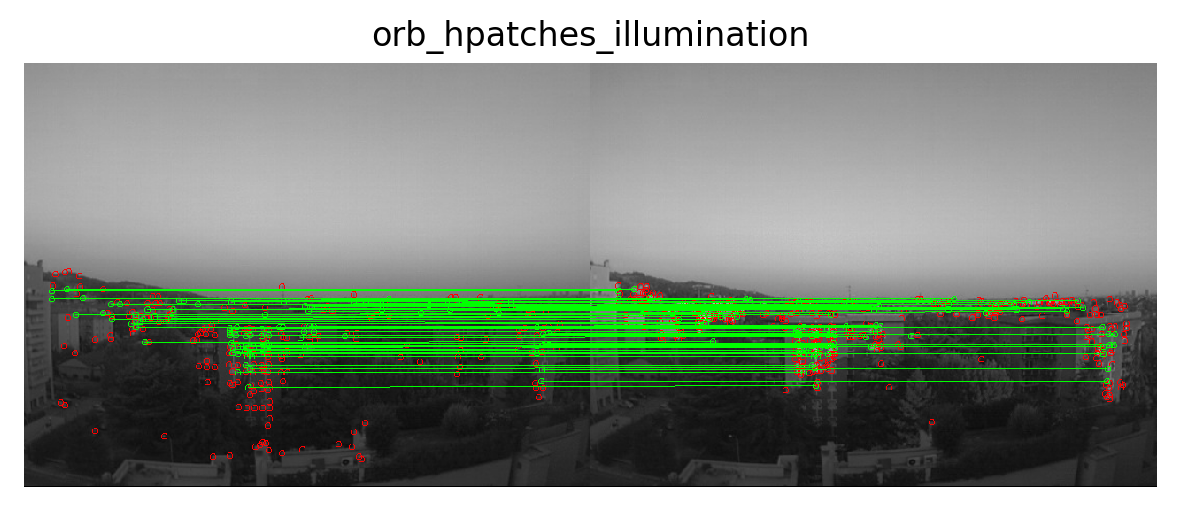

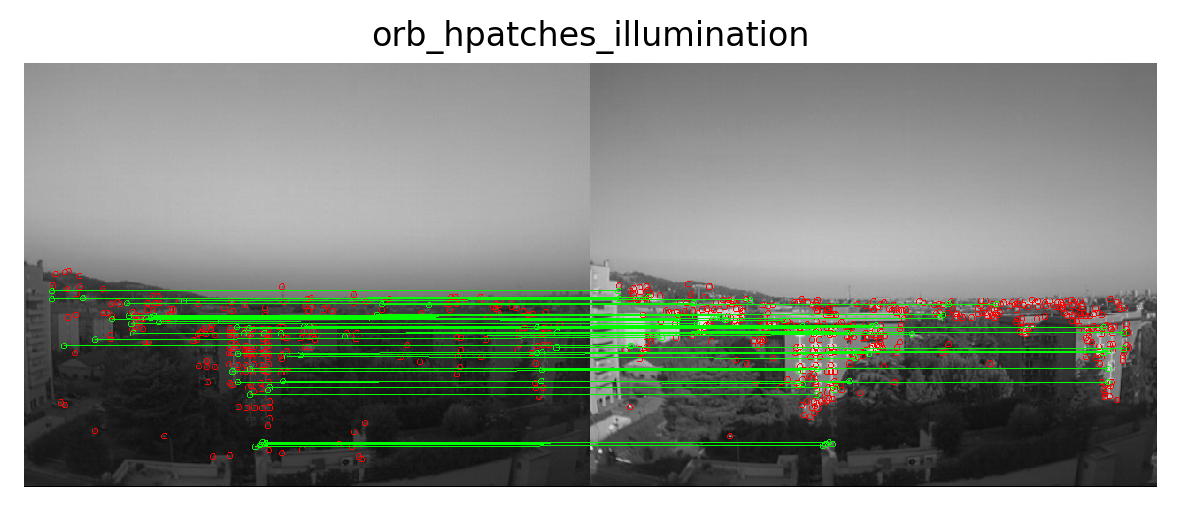

In [8]:
num_images = 2
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    for output in outputs:
        img = draw_matches(output) / 255.
        plot_imgs([img], titles=[e], dpi=200, cmap='gray')

### Homography estimation correctness

In [9]:
for exp in experiments:
    orb = True if exp[:3] == 'orb' else False
    correctness = ev.homography_estimation(exp, keep_k_points=1000, correctness_thresh=3, orb=orb)
    print('> {}: {}'.format(exp, correctness))

> sift_hpatches_illumination: 0.6771929824561403
> orb_hpatches_illumination: 0.44912280701754387


# All changes

In [10]:
experiments = ['sift_hpatches_all', 'orb_hpatches_all']

In [11]:
thresholds = [1, 3, 5]
for thresh in thresholds:
    print("Correctness threshold = " + str(thresh) + ":")
    for exp in experiments:
        orb = True if exp[:3] == 'orb' else False
        correctness = ev.homography_estimation(exp, keep_k_points=1000, correctness_thresh=thresh, orb=orb)
        print('> {}: {}'.format(exp, correctness))

Correctness threshold = 1:
> sift_hpatches_all: 0.29310344827586204
> orb_hpatches_all: 0.1396551724137931
Correctness threshold = 3:
> sift_hpatches_all: 0.4517241379310345
> orb_hpatches_all: 0.2810344827586207
Correctness threshold = 5:
> sift_hpatches_all: 0.4862068965517241
> orb_hpatches_all: 0.3482758620689655
